In [1]:
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [2]:
import tensorflow as tf
tf.__version__

'1.10.1'

### Perceptron

In [3]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=500, random_state=42)
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=500, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [4]:
y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

In [6]:
per_clf.coef_.shape

(1, 2)

In [7]:
per_clf.intercept_

array([3.])

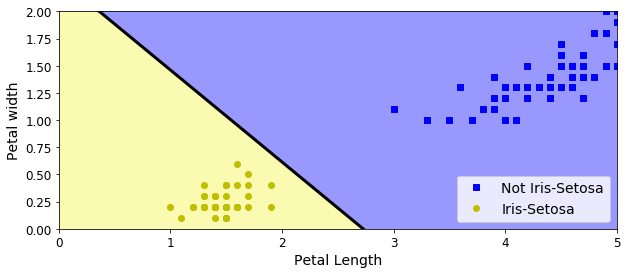

In [8]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# Decision boundary
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
                     np.linspace(axes[2], axes[3], 500).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred = per_clf.predict(X_new)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label='Iris-Setosa')
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a* axes[1] + b], 'k-', lw=3)

plt.contourf(x0, x1, zz, cmap=custom_cmap)

plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(fontsize=14)
plt.axis(axes)

plt.show()

### 用TF的高级API来训练MLP

In [9]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.dtype

dtype('uint8')

In [12]:
X_test.shape

(10000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
y_train.dtype

dtype('uint8')

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_val, X_train = X_train[:5000], X_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

In [17]:
feature_cols = [tf.feature_column.numeric_column('X', shape=(28 * 28))]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100],
                                     n_classes=10,
                                     feature_columns=feature_cols)

# Returns input function that would feed dict of numpy arrays into the model.
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'X': X_train}, y=y_train, num_epochs=40, batch_size=64, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpie5d_2mv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9d1fb85e48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpie5d_2mv/model.ckpt.
INFO:ten

INFO:tensorflow:global_step/sec: 498.761
INFO:tensorflow:loss = 1.685145, step = 7300 (0.200 sec)
INFO:tensorflow:global_step/sec: 517.529
INFO:tensorflow:loss = 0.8802873, step = 7400 (0.193 sec)
INFO:tensorflow:global_step/sec: 513.516
INFO:tensorflow:loss = 1.3917117, step = 7500 (0.195 sec)
INFO:tensorflow:global_step/sec: 508.377
INFO:tensorflow:loss = 0.88023335, step = 7600 (0.197 sec)
INFO:tensorflow:global_step/sec: 518.051
INFO:tensorflow:loss = 1.4575131, step = 7700 (0.193 sec)
INFO:tensorflow:global_step/sec: 523.054
INFO:tensorflow:loss = 0.23483768, step = 7800 (0.191 sec)
INFO:tensorflow:global_step/sec: 509.555
INFO:tensorflow:loss = 0.6124678, step = 7900 (0.196 sec)
INFO:tensorflow:global_step/sec: 528.35
INFO:tensorflow:loss = 1.9085183, step = 8000 (0.191 sec)
INFO:tensorflow:global_step/sec: 510.158
INFO:tensorflow:loss = 0.3579823, step = 8100 (0.195 sec)
INFO:tensorflow:global_step/sec: 494.56
INFO:tensorflow:loss = 0.16186261, step = 8200 (0.202 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 498.433
INFO:tensorflow:loss = 0.15615854, step = 15500 (0.201 sec)
INFO:tensorflow:global_step/sec: 518.508
INFO:tensorflow:loss = 0.08268622, step = 15600 (0.193 sec)
INFO:tensorflow:global_step/sec: 523.414
INFO:tensorflow:loss = 0.0717985, step = 15700 (0.191 sec)
INFO:tensorflow:global_step/sec: 523.293
INFO:tensorflow:loss = 0.05231361, step = 15800 (0.191 sec)
INFO:tensorflow:global_step/sec: 514.311
INFO:tensorflow:loss = 0.043462034, step = 15900 (0.195 sec)
INFO:tensorflow:global_step/sec: 522.122
INFO:tensorflow:loss = 0.15437652, step = 16000 (0.191 sec)
INFO:tensorflow:global_step/sec: 515.496
INFO:tensorflow:loss = 0.14931633, step = 16100 (0.194 sec)
INFO:tensorflow:global_step/sec: 519.804
INFO:tensorflow:loss = 0.008284021, step = 16200 (0.192 sec)
INFO:tensorflow:global_step/sec: 510.186
INFO:tensorflow:loss = 0.024472613, step = 16300 (0.196 sec)
INFO:tensorflow:global_step/sec: 524.863
INFO:tensorflow:loss = 0.11279896, step = 16400 

INFO:tensorflow:global_step/sec: 510.137
INFO:tensorflow:loss = 0.13940816, step = 23600 (0.195 sec)
INFO:tensorflow:global_step/sec: 517.872
INFO:tensorflow:loss = 0.018503021, step = 23700 (0.193 sec)
INFO:tensorflow:global_step/sec: 517.848
INFO:tensorflow:loss = 0.031070793, step = 23800 (0.193 sec)
INFO:tensorflow:global_step/sec: 511.933
INFO:tensorflow:loss = 0.08892197, step = 23900 (0.197 sec)
INFO:tensorflow:global_step/sec: 509.01
INFO:tensorflow:loss = 0.0500963, step = 24000 (0.195 sec)
INFO:tensorflow:global_step/sec: 516.491
INFO:tensorflow:loss = 0.04502502, step = 24100 (0.194 sec)
INFO:tensorflow:global_step/sec: 517.985
INFO:tensorflow:loss = 0.033695213, step = 24200 (0.193 sec)
INFO:tensorflow:global_step/sec: 519.822
INFO:tensorflow:loss = 0.08421623, step = 24300 (0.193 sec)
INFO:tensorflow:global_step/sec: 515.982
INFO:tensorflow:loss = 0.018938426, step = 24400 (0.194 sec)
INFO:tensorflow:global_step/sec: 519.009
INFO:tensorflow:loss = 0.07213215, step = 24500 

INFO:tensorflow:global_step/sec: 504.966
INFO:tensorflow:loss = 0.030778434, step = 31700 (0.198 sec)
INFO:tensorflow:global_step/sec: 519.624
INFO:tensorflow:loss = 0.028982809, step = 31800 (0.192 sec)
INFO:tensorflow:global_step/sec: 512.584
INFO:tensorflow:loss = 0.010193774, step = 31900 (0.195 sec)
INFO:tensorflow:global_step/sec: 517.555
INFO:tensorflow:loss = 0.018574556, step = 32000 (0.193 sec)
INFO:tensorflow:global_step/sec: 513.416
INFO:tensorflow:loss = 0.027402073, step = 32100 (0.195 sec)
INFO:tensorflow:global_step/sec: 508.626
INFO:tensorflow:loss = 0.006557867, step = 32200 (0.197 sec)
INFO:tensorflow:global_step/sec: 507.945
INFO:tensorflow:loss = 0.0067086024, step = 32300 (0.197 sec)
INFO:tensorflow:global_step/sec: 516.991
INFO:tensorflow:loss = 0.006900887, step = 32400 (0.193 sec)
INFO:tensorflow:global_step/sec: 517.114
INFO:tensorflow:loss = 0.016803853, step = 32500 (0.193 sec)
INFO:tensorflow:global_step/sec: 511.456
INFO:tensorflow:loss = 0.036828827, step

In [18]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_test,
                                                   shuffle=True)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-09-02:53:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpie5d_2mv/model.ckpt-34375
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-09-02:53:15
INFO:tensorflow:Saving dict for global step 34375: accuracy = 0.9806, average_loss = 0.10376669, global_step = 34375, loss = 13.135024
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 34375: /tmp/tmpie5d_2mv/model.ckpt-34375


In [19]:
eval_results

{'accuracy': 0.9806,
 'average_loss': 0.10376669,
 'global_step': 34375,
 'loss': 13.135024}

In [20]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpie5d_2mv/model.ckpt-34375
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([1]),
 'classes': array([b'1'], dtype=object),
 'logits': array([-9.507998 , 27.031963 ,  3.8724296,  1.2669499,  7.028165 ,
        -7.4642935, -7.3827934,  1.3981817, -2.866457 ,  5.226049 ],
       dtype=float32),
 'probabilities': array([1.3517482e-16, 1.0000000e+00, 8.7486685e-11, 6.4624491e-12,
        2.0533371e-09, 1.0434354e-15, 1.1320380e-15, 7.3686881e-12,
        1.0358122e-13, 3.3869743e-10], dtype=float32)}

In [21]:
len(y_pred)

10000

### 用纯TF来训练DNN

使用低级的API构建一个与前面相同的模型，实现一个mini-batch GD来训练MNIST数据集。
1. 构建阶段，建立TF的计算图
2. 执行阶段，具体运行这个图来训练模型

#### 构建阶段

指定输入输出的个数，并设置每层的隐藏神经元的个数：

In [22]:
# Specify  the number of inputs and outputs
n_inputs = 28 * 28
n_outputs = 10

# Sets the number of hidden neurous in each layer
n_hidden1 = 300
n_hidden2 = 100

In [23]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, 28*28), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

创建一个`neuron_layer()`函数来每次创建一个层。需要指定：输入、单元数量、激活函数、层次的名字。

In [24]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='weights')
        b = tf.Variable(tf.zeros((n_neurons)), name='bias')
        z = tf.matmul(X, W) + b
        if activation == 'relu':
            return tf.nn.relu(z)
        else:
            return z

In [25]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, 'hidden1', 'relu')
    hidden2 = neuron_layer(hidden1, n_hidden2, 'hidden2', 'relu')
    logits = neuron_layer(hidden2, n_outputs, 'outputs')

In [26]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [27]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [28]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [29]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

#### 执行阶段

In [30]:
n_epochs = 40
batch_size = 64

In [31]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batchs = len(X) / batch_size
    for batch_index in np.array_split(rnd_idx, n_batchs):
        X_batch, y_batch = X[batch_index], y[batch_index]
        yield X_batch, y_batch

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "batch accuracy:", acc_batch, "val accuracy:", acc_val)
    
    save_path = saver.save(
        sess, '/home/bingli/Codes/handson_ml_dl/my_model_final.ckpt')

0 batch accuracy: 0.890625 val accuracy: 0.91
1 batch accuracy: 0.953125 val accuracy: 0.9292
2 batch accuracy: 0.953125 val accuracy: 0.9368
3 batch accuracy: 0.875 val accuracy: 0.943
4 batch accuracy: 0.953125 val accuracy: 0.9478
5 batch accuracy: 0.9375 val accuracy: 0.9492
6 batch accuracy: 0.984375 val accuracy: 0.9558
7 batch accuracy: 0.953125 val accuracy: 0.9574
8 batch accuracy: 0.96875 val accuracy: 0.9614
9 batch accuracy: 0.953125 val accuracy: 0.9626
10 batch accuracy: 0.9375 val accuracy: 0.9674
11 batch accuracy: 0.96875 val accuracy: 0.9694
12 batch accuracy: 0.984375 val accuracy: 0.9664
13 batch accuracy: 0.953125 val accuracy: 0.969
14 batch accuracy: 1.0 val accuracy: 0.9702
15 batch accuracy: 0.9375 val accuracy: 0.9694
16 batch accuracy: 0.984375 val accuracy: 0.9714
17 batch accuracy: 0.984375 val accuracy: 0.9706
18 batch accuracy: 1.0 val accuracy: 0.9728
19 batch accuracy: 0.984375 val accuracy: 0.973
20 batch accuracy: 0.984375 val accuracy: 0.9726
21 batc

使用训练好的网络做预测：

In [33]:
with tf.Session() as sess:
    saver.restore(sess, '/home/bingli/Codes/handson_ml_dl/my_model_final.ckpt')
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from /home/bingli/Codes/handson_ml_dl/my_model_final.ckpt


In [34]:
Z.shape

(20, 10)

In [35]:
Z

array([[-2.52432466e-01, -3.51013327e+00,  2.93915868e+00,
         4.82138729e+00, -7.97427750e+00, -8.06432962e-01,
        -9.87895012e+00,  1.21315498e+01, -9.71748531e-01,
         2.37094045e+00],
       [ 8.78010094e-01,  4.85547113e+00,  1.24715519e+01,
         7.63855791e+00, -7.71933937e+00,  2.78655934e+00,
         4.26532269e+00, -1.08000841e+01,  3.05596995e+00,
        -8.50636196e+00],
       [-2.61380172e+00,  7.35737276e+00,  7.67856121e-01,
        -1.28115451e+00, -2.71270633e-01,  1.81738660e-01,
        -7.96743691e-01,  1.76975226e+00,  1.16889155e+00,
        -2.67972636e+00],
       [ 1.37338419e+01, -2.38989085e-01,  1.88802731e+00,
        -6.65542483e-01, -1.17229104e+00,  5.85922003e-01,
         1.67233598e+00,  2.72251391e+00, -6.93903351e+00,
         1.41536880e+00],
       [ 3.19783330e-01, -5.58430433e+00, -8.17542255e-01,
        -1.52586019e+00,  8.83055019e+00, -2.59428024e+00,
        -1.14577115e+00,  3.45831656e+00, -9.44922447e-01,
         4.

In [36]:
print('Predicted classes:', y_pred)

Predicted classes: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [37]:
print('Actual classes:', y_test[:20])

Actual classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [38]:
import tfgraphviz as tfg

g = tfg.board(tf.get_default_graph())
g.view()

'G.gv.pdf'

> 会生成一个pdf.

In [39]:
from tensorflow_graph_in_jupyter import show_graph

show_graph(tf.get_default_graph())

### 使用`tf.layers.dense()`

In [40]:
n_inputs = 28 * 28
n_outputs = 10

n_hidden1 = 300
n_hidden2 = 100

In [46]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

In [47]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [48]:
logits.shape

TensorShape([Dimension(None), Dimension(10)])

In [49]:
y_proba.shape

TensorShape([Dimension(None), Dimension(10)])

In [50]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [51]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [52]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [53]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [54]:
n_epochs = 20
batch_size = 64

with tf.Session() as sess:
    init.run()
    
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
        print(epoch, "batch acc:", acc_batch, "val acc:", acc_val)
    save_path = saver.save(
        sess, '/home/bingli/Codes/handson_ml_dl/my_final_model.ckpt')

0 batch acc: 0.890625 val acc: 0.8938
1 batch acc: 0.921875 val acc: 0.9188
2 batch acc: 0.953125 val acc: 0.9306
3 batch acc: 0.921875 val acc: 0.9376
4 batch acc: 0.921875 val acc: 0.941
5 batch acc: 0.9375 val acc: 0.9438
6 batch acc: 0.953125 val acc: 0.9488
7 batch acc: 0.953125 val acc: 0.9516
8 batch acc: 0.9375 val acc: 0.956
9 batch acc: 0.9375 val acc: 0.9584
10 batch acc: 0.9375 val acc: 0.9626
11 batch acc: 0.953125 val acc: 0.9636
12 batch acc: 0.984375 val acc: 0.9646
13 batch acc: 0.953125 val acc: 0.9666
14 batch acc: 1.0 val acc: 0.9662
15 batch acc: 0.9375 val acc: 0.9674
16 batch acc: 0.984375 val acc: 0.9688
17 batch acc: 0.984375 val acc: 0.97
18 batch acc: 0.984375 val acc: 0.9708
19 batch acc: 0.96875 val acc: 0.9702


In [55]:
show_graph(tf.get_default_graph())